In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree


In [3]:
df = pd.read_csv("train.csv")
print("Shape:", df.shape)
df.head()


Shape: (576, 12)


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df['fake'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean

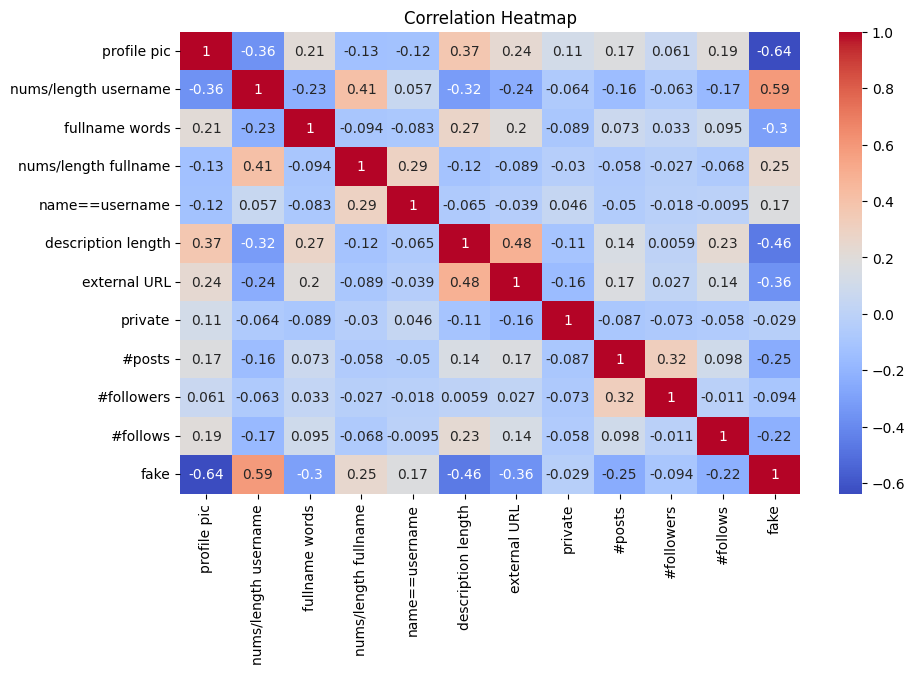

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


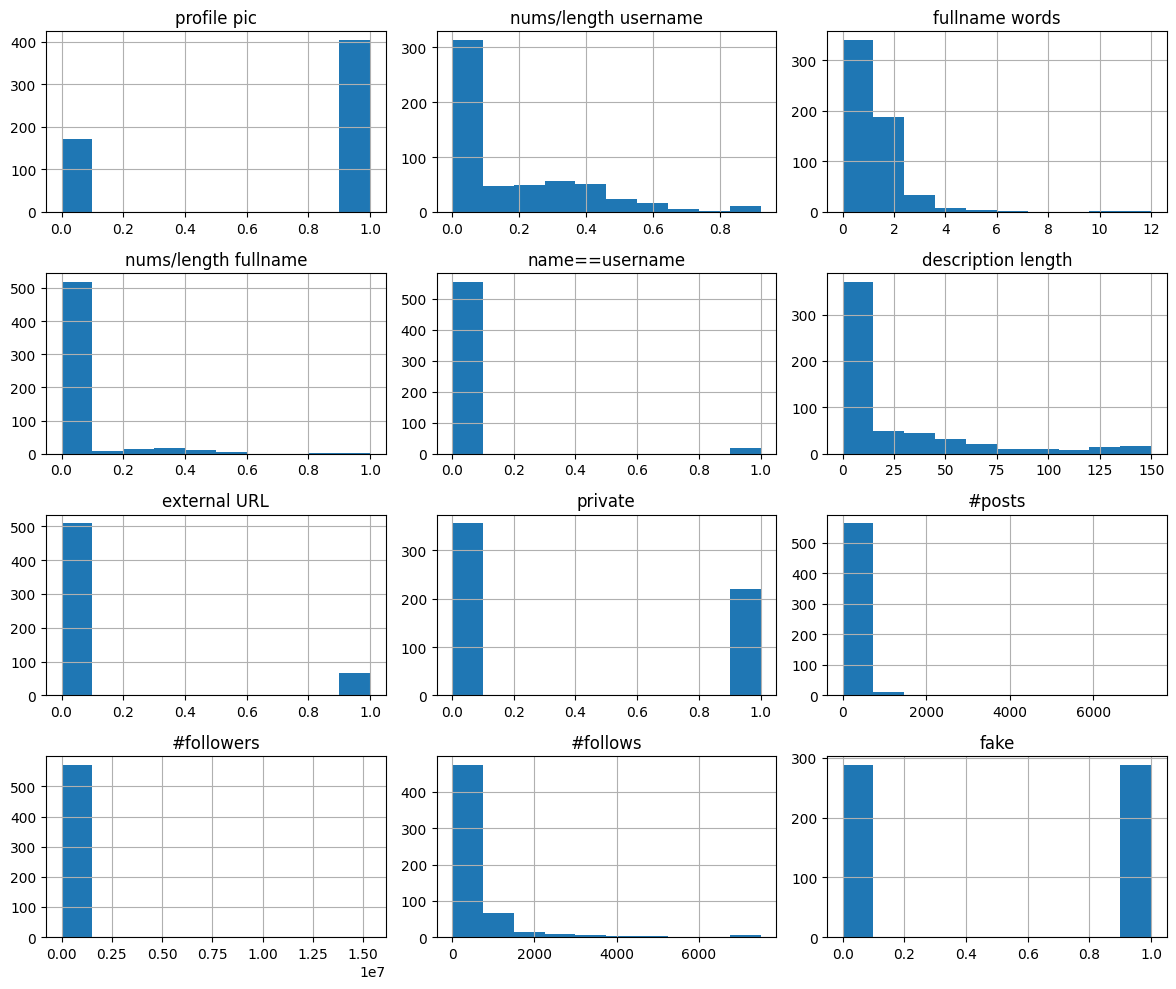

In [6]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [7]:
X = df.drop(['fake'], axis=1)
y = df['fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8706896551724138
Confusion Matrix:
 [[57  6]
 [ 9 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



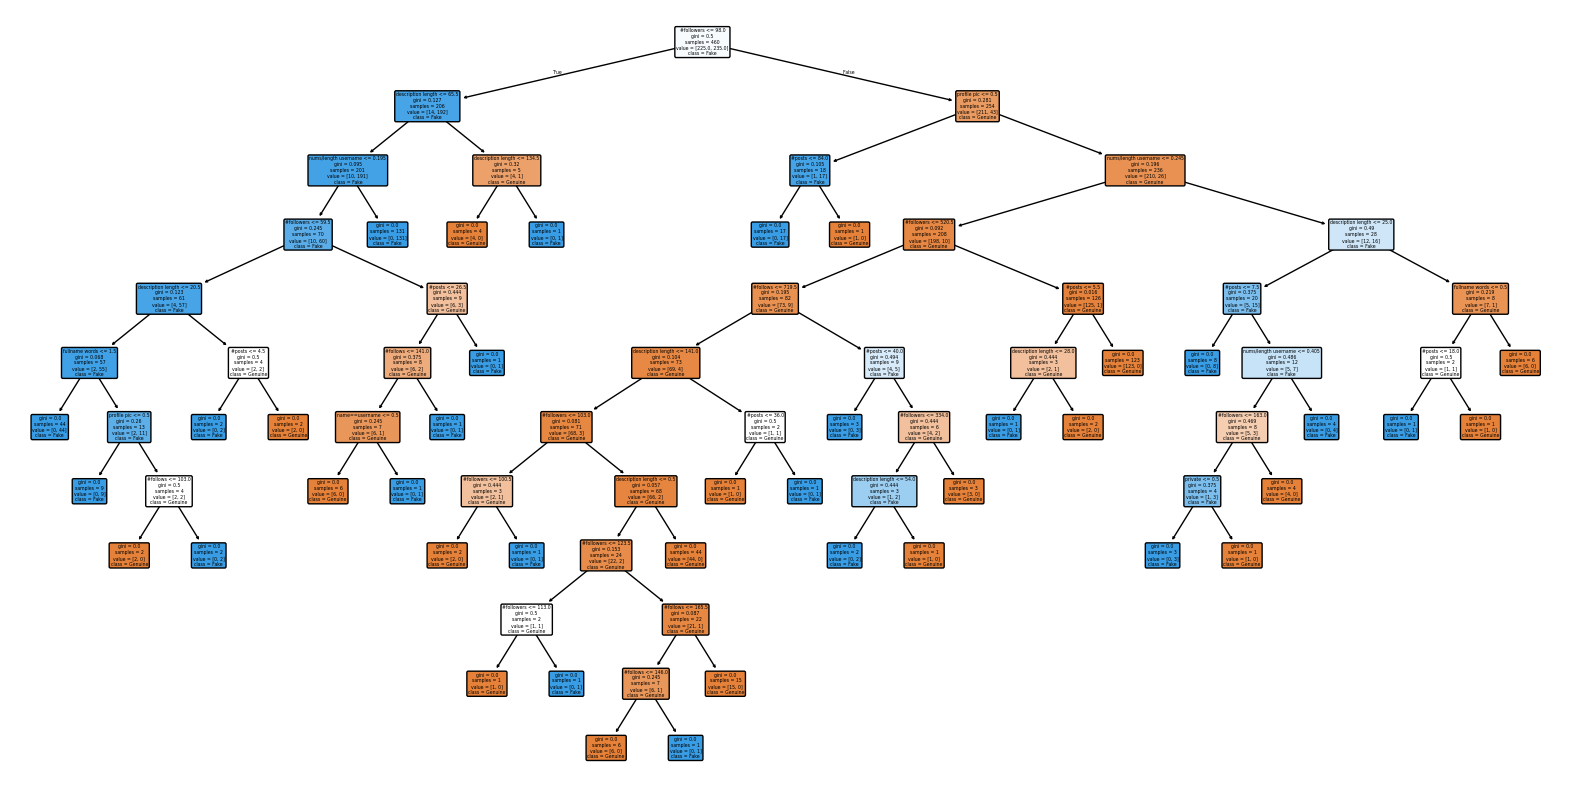

In [10]:
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Genuine', 'Fake'], rounded=True)
plt.show()


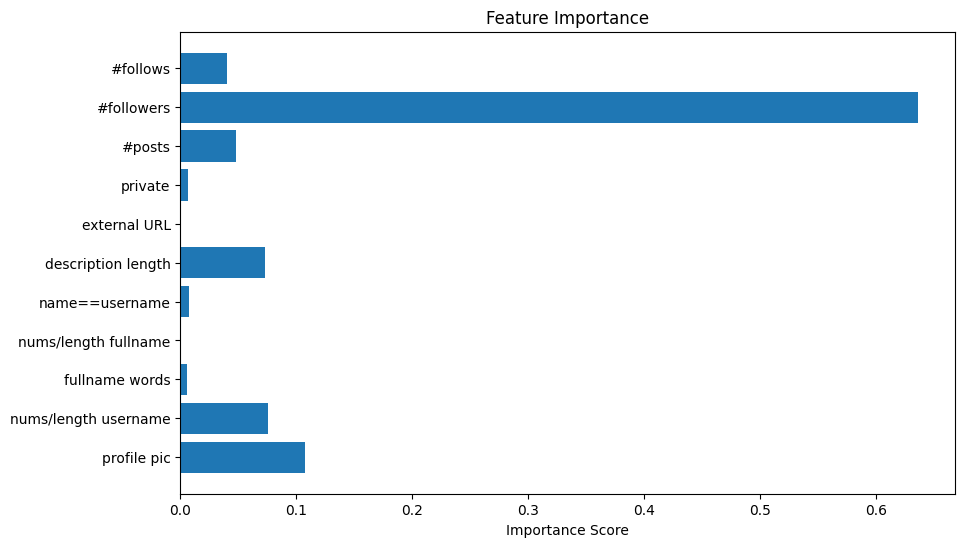

In [11]:
importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


📊 Model Summary
----------------------------------------
Training Accuracy: 1.00
Testing Accuracy : 0.87

Confusion Matrix:
[[57  6]
 [ 9 44]]


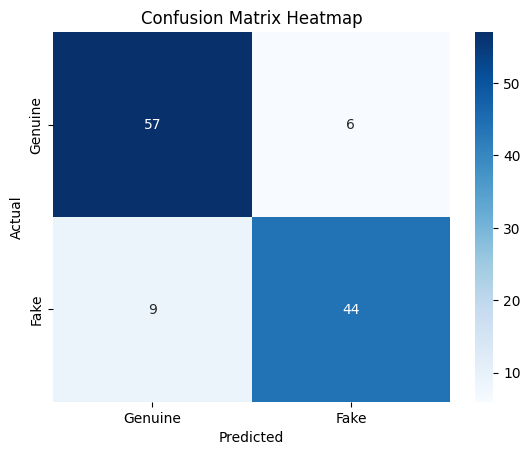

In [12]:
print("📊 Model Summary")
print("-" * 40)
print(f"Training Accuracy: {model.score(X_train, y_train):.2f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_pred):.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Genuine", "Fake"], yticklabels=["Genuine", "Fake"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
# Example: Predicting one new Instagram account
# (Change these values to test different profiles)

new_account = pd.DataFrame([{
    'profile pic': 0,
    'nums/length username': 0.6,
    'fullname words': 1,
    'nums/length fullname': 0.0,
    'name==username': 1,
    'description length': 20,
    'external URL': 0,
    'private': 1,
    '#posts': 10,
    '#followers': 80,
    '#follows': 300
}])

prediction = model.predict(new_account)[0]

result = "Fake Account" if prediction == 1 else "Genuine Account"
print("🔍 Predicted Result:", result)


🔍 Predicted Result: Fake Account


In [14]:
# Example: Predicting a genuine Instagram account

real_account = pd.DataFrame([{
    'profile pic': 1,
    'nums/length username': 0.2,
    'fullname words': 2,
    'nums/length fullname': 0.1,
    'name==username': 0,
    'description length': 75,
    'external URL': 1,
    'private': 0,
    '#posts': 120,
    '#followers': 1500,
    '#follows': 300
}])

real_prediction = model.predict(real_account)[0]

result = "Fake Account" if real_prediction == 1 else "Genuine Account"
print("✅ Predicted Result:", result)


✅ Predicted Result: Genuine Account
